# Importing libraries and file.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('LoanData_Preprocessed_v1.1.csv')

print(df.head())

    age  employ  address  income  debtinc   creddebt   othdebt   ed  default
0  41.0      17       12   176.0      9.3  11.359392  5.008608  3.0        1
1  27.0      10        6    31.0     17.3   1.362202  4.000798  1.0        0
2  40.0      15        7     NaN      5.5   0.856075  2.168925  1.0        0
3  41.0      15       14   120.0      2.9   2.658720  0.821280  NaN        0
4  24.0       2        0    28.0     17.3   1.787436  3.056564  2.0        1


# Findind data types

In [ ]:
print(df.dtypes)

age         float64
employ        int64
address       int64
income      float64
debtinc     float64
creddebt    float64
othdebt     float64
ed          float64
default       int64
dtype: object


# Cheking if the Dataset is balanced or not

In [ ]:
counts = df['default'].value_counts()
percentages = df['default'].value_counts(normalize=True) * 100

print("Class Distribution (Count):\n", counts)
print("\nClass Distribution (Percentage):\n", percentages)

Class Distribution (Count):
 default
0    517
1    183
Name: count, dtype: int64

Class Distribution (Percentage):
 default
0    73.857143
1    26.142857
Name: proportion, dtype: float64


# Description of the data

In [ ]:
print(df.columns)

pd.set_option('display.max_columns', None)
print(df.describe())

Index(['age', 'employ', 'address', 'income', 'debtinc', 'creddebt', 'othdebt',
       'ed', 'default'],
      dtype='object')
              age      employ     address     income     debtinc    creddebt  \
count  680.000000  700.000000  700.000000  663.00000  700.000000  700.000000   
mean    34.750000    8.388571    8.268571   45.74359   10.260571    1.553553   
std      7.973215    6.658039    6.821609   37.44108    6.827234    2.117197   
min     20.000000    0.000000    0.000000   14.00000    0.400000    0.011696   
25%     28.000000    3.000000    3.000000   24.00000    5.000000    0.369059   
50%     34.000000    7.000000    7.000000   34.00000    8.600000    0.854869   
75%     40.000000   12.000000   12.000000   54.50000   14.125000    1.901955   
max     56.000000   31.000000   34.000000  446.00000   41.300000   20.561310   

          othdebt          ed     default  
count  700.000000  680.000000  700.000000  
mean     3.058209    1.717647    0.261429  
std      3.287555    

# Statistical calculations

In [ ]:

print("Continuous Columns:")
continuous_cols = ['age', 'income', 'debtinc', 'creddebt', 'othdebt']
print(continuous_cols)

for col in continuous_cols:
    print(f"\n Statistics for {col}:")
    print("Mean:", df[col].mean())
    print("Median:", df[col].median())
    print("Variance:", df[col].var())
    print("Standard Deviation:", df[col].std())

print("Discrete Columns:")
discrete_cols = ['employ', 'address', 'ed', 'default']
print(discrete_cols)

for col in discrete_cols:
    print(f"\n Frequency and Percentage for {col}:")
    counts = df[col].value_counts()
    percentages = df[col].value_counts(normalize=True) * 100
    summary = pd.concat([counts, percentages], axis=1)
    summary.columns = ['Count', 'Percentage']
    print(summary)

Continuous Columns:
['age', 'income', 'debtinc', 'creddebt', 'othdebt']

 Statistics for age:
Mean: 34.75
Median: 34.0
Variance: 63.57216494845361
Standard Deviation: 7.973215471091548

 Statistics for income:
Mean: 45.743589743589745
Median: 34.0
Variance: 1401.8344565806797
Standard Deviation: 37.44107979987596

 Statistics for debtinc:
Mean: 10.260571428571428
Median: 8.6
Variance: 46.611118414060925
Standard Deviation: 6.827233584260973

 Statistics for creddebt:
Mean: 1.553552817142857
Median: 0.8548695
Variance: 4.482523082205477
Standard Deviation: 2.117196987104761

 Statistics for othdebt:
Mean: 3.0582086114285723
Median: 1.9875675
Variance: 10.808014786001811
Standard Deviation: 3.287554529738147
Discrete Columns:
['employ', 'address', 'ed', 'default']

 Frequency and Percentage for employ:
        Count  Percentage
employ                   
0          62    8.857143
1          49    7.000000
4          47    6.714286
6          46    6.571429
9          45    6.428571
2     

## Visualisations

### Bar Chart: Education Level

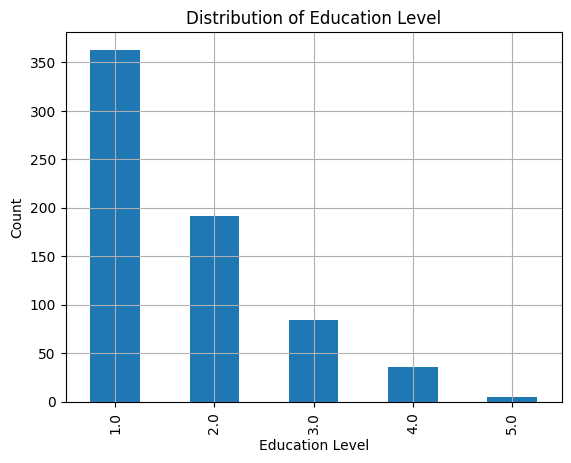

In [ ]:
df['ed'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.grid(True)
plt.show()

### Pie Chart: Loan Default Distribution

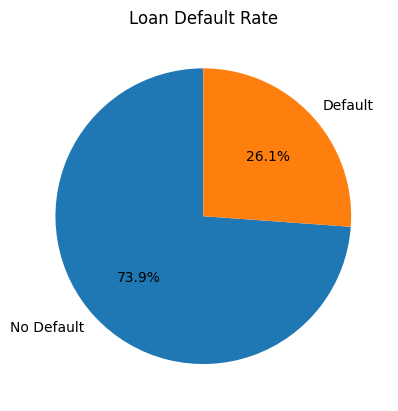

In [ ]:
df['default'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=['No Default', 'Default'], startangle=90)
plt.title('Loan Default Rate')
plt.ylabel('')
plt.show()

### Line Graph: Average Income by Education Level

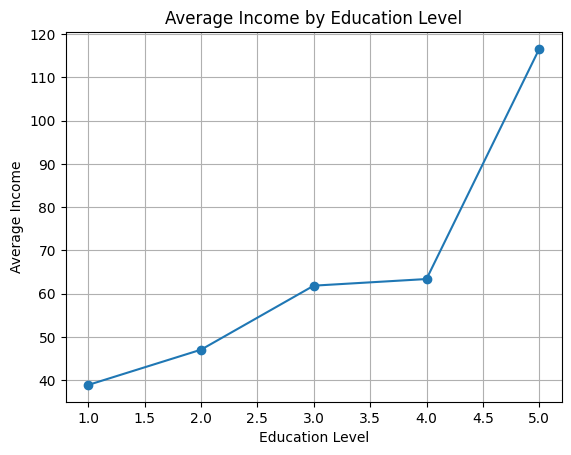

In [ ]:
df.groupby('ed')['income'].mean().plot(kind='line', marker='o')
plt.title('Average Income by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Income')
plt.grid(True)
plt.show()

### Bar Chart: Employment Years

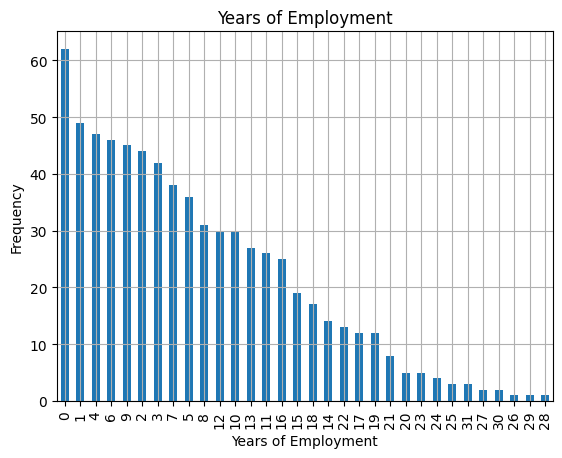

In [ ]:
df['employ'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.title('Years of Employment')
plt.xlabel('Years of Employment')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Correlation Heatmap

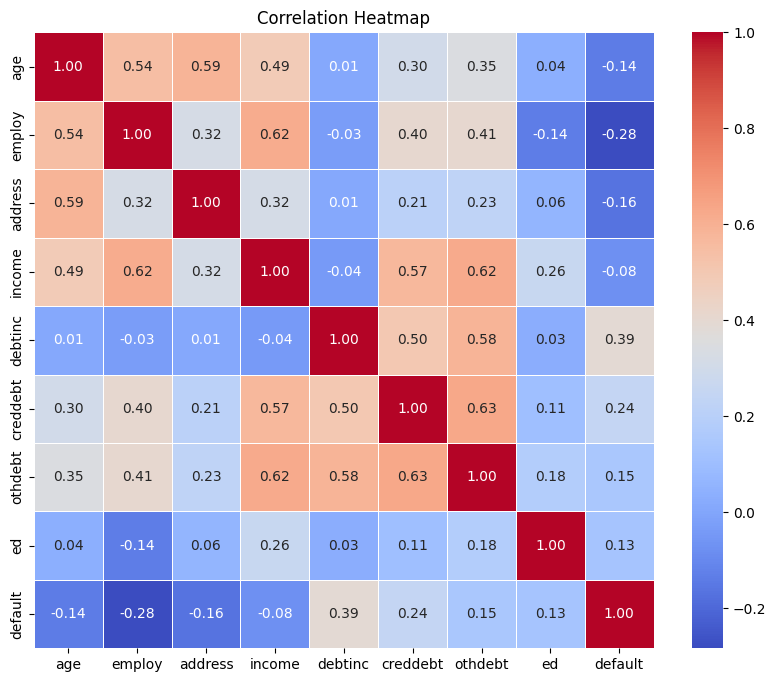

In [ ]:
import seaborn as sns

corr = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Check for missing values

In [13]:
print(df.isnull().sum())

age         20
employ       0
address      0
income      37
debtinc      0
creddebt     0
othdebt      0
ed          20
default      0
dtype: int64


Handling the missing values

In [15]:
df['age'] = df['age'].fillna(df['age'].median())
df['income'] = df['income'].fillna(df['income'].median())
df['ed'] = df['ed'].fillna(df['ed'].mode()[0])

checking for the missing values again

In [16]:
print(df.isnull().sum())

age         0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
ed          0
default     0
dtype: int64
